<a href="https://colab.research.google.com/github/Kshitez-Pratap-Singh/AMP-Crypto-Arima/blob/main/AMP_Crypto_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
import yfinance as yf
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE
from keras.optimizers import Adam, SGD

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
end_date = datetime.today().strftime('%Y-%m-%d')
df = yf.download('AMP', start='2005-09-15', end=end_date,interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head(30)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-09-15,38.020000,38.099998,37.000000,37.009998,25.439407,1529800
2005-09-16,37.000000,37.000000,36.599998,36.599998,25.157593,62400
2005-09-19,36.599998,36.700001,36.450001,36.700001,25.226320,1162300
2005-09-20,36.599998,37.000000,36.599998,36.700001,25.226320,654900
2005-09-21,36.599998,36.599998,36.000000,36.400002,25.020113,424300
2005-09-22,36.400002,37.200001,36.400002,37.200001,25.570004,864800
2005-09-23,37.200001,38.099998,37.200001,37.680000,25.899937,1249900
2005-09-26,37.750000,38.150002,37.750000,37.750000,25.948050,821400
2005-09-27,37.750000,37.900002,37.139999,37.250000,25.604372,1514000


In [ ]:
df.shape

(4620, 6)

In [ ]:
df.drop('Close', axis=1,inplace=True)

In [ ]:
df['Tomorrow']=df['Close'].shift(-1)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow
Date,,,,,,,
2005-09-15,38.020000,38.099998,37.000000,37.009998,25.439407,1529800,36.599998
2005-09-16,37.000000,37.000000,36.599998,36.599998,25.157593,62400,36.700001
2005-09-19,36.599998,36.700001,36.450001,36.700001,25.226320,1162300,36.700001
2005-09-20,36.599998,37.000000,36.599998,36.700001,25.226320,654900,36.400002
2005-09-21,36.599998,36.599998,36.000000,36.400002,25.020113,424300,37.200001
...,...,...,...,...,...,...,...
2024-01-18,372.209991,375.000000,369.290009,374.880005,374.880005,519300,381.670013
2024-01-19,377.630005,382.260010,374.059998,381.670013,381.670013,1231800,387.109985
2024-01-22,382.660004,388.690002,382.660004,387.109985,387.109985,476400,387.799988


In [ ]:
df['Target']=(df['Tomorrow']>df['Close']).astype(int)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
2005-09-15,38.020000,38.099998,37.000000,37.009998,25.439407,1529800,36.599998,0
2005-09-16,37.000000,37.000000,36.599998,36.599998,25.157593,62400,36.700001,1
2005-09-19,36.599998,36.700001,36.450001,36.700001,25.226320,1162300,36.700001,0
2005-09-20,36.599998,37.000000,36.599998,36.700001,25.226320,654900,36.400002,0
2005-09-21,36.599998,36.599998,36.000000,36.400002,25.020113,424300,37.200001,1
...,...,...,...,...,...,...,...,...
2024-01-18,372.209991,375.000000,369.290009,374.880005,374.880005,519300,381.670013,1
2024-01-19,377.630005,382.260010,374.059998,381.670013,381.670013,1231800,387.109985,1
2024-01-22,382.660004,388.690002,382.660004,387.109985,387.109985,476400,387.799988,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)
train=df.iloc[:-100]
test=df[-100:]

predictors=["Close","Volume","Open","High","Low"]
model.fit(train[predictors],train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score
preds=model.predict(test[predictors])

In [ ]:
preds=pd.Series(preds,index=test.index)

In [ ]:
precision_score(test['Target'],preds)

0.3888888888888889

<Axes: xlabel='Date'>

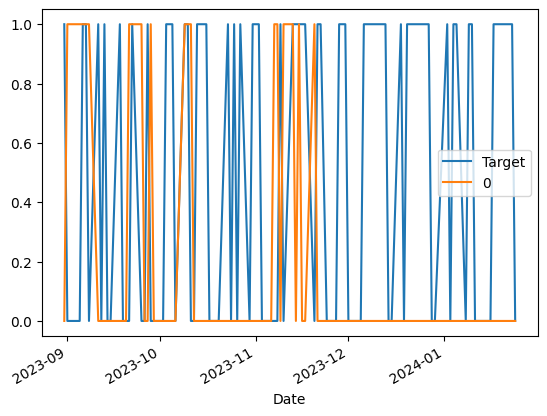

In [ ]:
combined=pd.concat([test['Target'],preds],axis=1)
combined.plot()

In [ ]:
#backtesting
def predict(train,test,predictors,model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
#2500 day year data, and 250 next year
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
predictions=backtest(df,model,predictors)

In [ ]:
predictions['Predictions'].value_counts()

0    1342
1     778
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions['Target'],predictions['Predictions'])

0.5347043701799485

In [ ]:
predictions['Target'].value_counts()/predictions.shape[0]

1    0.520755
0    0.479245
Name: Target, dtype: float64

In [ ]:
horizons=[2,5,60,250,1000]
new_predictors=[]

for horizon in horizons:
  rolling_averages=df.rolling(horizon).mean()
  ratio_column=f"Close_Ratio_{horizon}"
  df[ratio_column]=df["Close"]/rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  df[trend_column] = df.shift(1).rolling(horizon).sum()["Target"]
  new_predictors+= [ratio_column, trend_column]

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
2005-09-15,38.020000,38.099998,37.000000,37.009998,25.439407,1529800,36.599998,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-16,37.000000,37.000000,36.599998,36.599998,25.157593,62400,36.700001,1,0.994430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-19,36.599998,36.700001,36.450001,36.700001,25.226320,1162300,36.700001,0,1.001364,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-20,36.599998,37.000000,36.599998,36.700001,25.226320,654900,36.400002,0,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-21,36.599998,36.599998,36.000000,36.400002,25.020113,424300,37.200001,1,0.995896,0.0,0.992312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18,372.209991,375.000000,369.290009,374.880005,374.880005,519300,381.670013,1,1.003775,1.0,0.999637,2.0,1.057280,35.0,1.127400,130.0,1.449048,520.0
2024-01-19,377.630005,382.260010,374.059998,381.670013,381.670013,1231800,387.109985,1,1.008975,2.0,1.015901,2.0,1.072884,36.0,1.147152,130.0,1.474065,520.0
2024-01-22,382.660004,388.690002,382.660004,387.109985,387.109985,476400,387.799988,1,1.007076,2.0,1.024540,3.0,1.084435,36.0,1.162823,130.0,1.493825,520.0


In [ ]:
df=df.dropna()

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
2009-09-04,28.910000,29.120001,28.590000,29.000000,21.168697,1770900,29.570000,1,1.001554,2.0,1.005548,2.0,1.101963,32.0,1.195910,127.0,0.658083,510.0
2009-09-08,29.389999,29.600000,28.879999,29.570000,21.584778,1986900,30.100000,1,1.009732,2.0,1.028593,3.0,1.119899,33.0,1.222010,128.0,0.671125,511.0
2009-09-09,29.549999,30.120001,29.190001,30.100000,21.971649,1907100,31.000000,1,1.008882,2.0,1.033725,4.0,1.136156,33.0,1.246722,128.0,0.683256,511.0
2009-09-10,30.030001,31.030001,29.389999,31.000000,22.628609,2625500,30.250000,0,1.014730,2.0,1.043209,5.0,1.165297,34.0,1.286920,128.0,0.703777,512.0
2009-09-11,31.080000,31.139999,30.230000,30.250000,22.081150,2617100,31.629999,1,0.987755,1.0,1.008871,4.0,1.132563,34.0,1.258202,128.0,0.686846,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-17,369.140015,376.420013,368.410004,372.059998,372.059998,501100,374.880005,1,0.998109,0.0,0.990475,2.0,1.052428,34.0,1.119616,129.0,1.439314,520.0
2024-01-18,372.209991,375.000000,369.290009,374.880005,374.880005,519300,381.670013,1,1.003775,1.0,0.999637,2.0,1.057280,35.0,1.127400,130.0,1.449048,520.0
2024-01-19,377.630005,382.260010,374.059998,381.670013,381.670013,1231800,387.109985,1,1.008975,2.0,1.015901,2.0,1.072884,36.0,1.147152,130.0,1.474065,520.0


In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
predictions = backtest(df, model, new_predictors)
predictions["Predictions"].value_counts()

0.0    1026
1.0      93
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.6129032258064516

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.52815
0    0.47185
Name: Target, dtype: float64

In [ ]:
predictions

,Target,Predictions
Date,,
2019-08-13,0,0.0
2019-08-14,1,0.0
2019-08-15,1,0.0
2019-08-16,1,0.0
2019-08-19,0,0.0
...,...,...
2024-01-17,1,1.0
2024-01-18,1,0.0
2024-01-19,1,0.0


In [ ]:
df=df[['Open','High','Low','Adj Close','Volume']].reset_index()
df.columns=['Date','Open','High','Low','Adj Close','Volume']

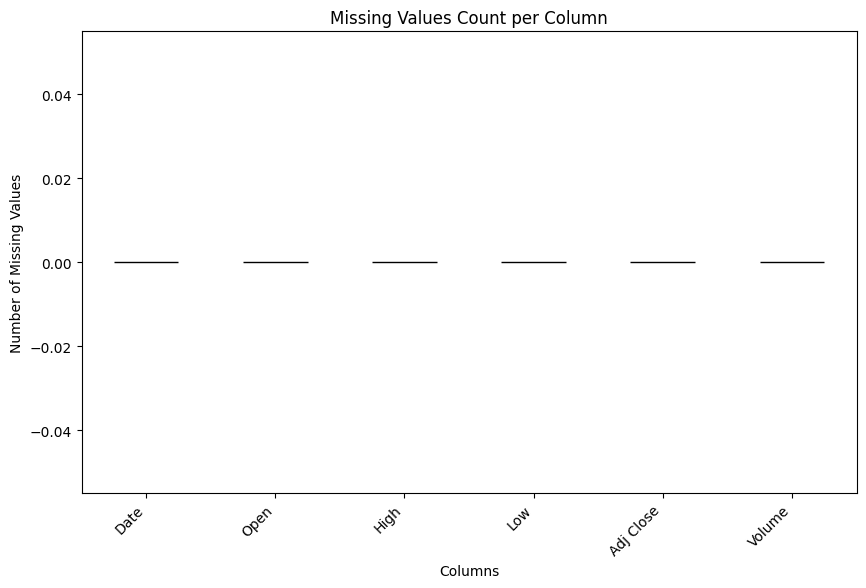

In [ ]:
missing_values = df.isnull().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Missing Values Count per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-21-a7434eca7f55>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

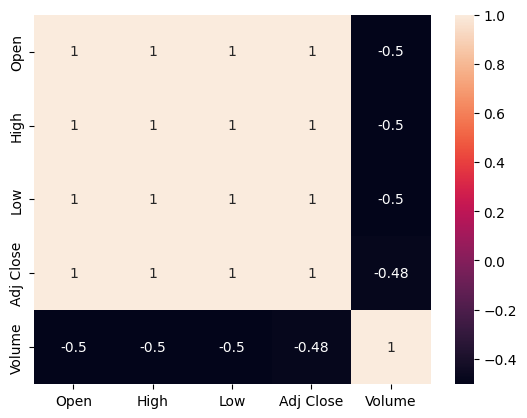

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [ ]:
corr_matrix = df.corr()['Adj Close']
corr_matrix

<ipython-input-22-34b845c5d491>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()['Adj Close']


Open         0.998188
High         0.998476
Low          0.998222
Adj Close    1.000000
Volume      -0.482506
Name: Adj Close, dtype: float64

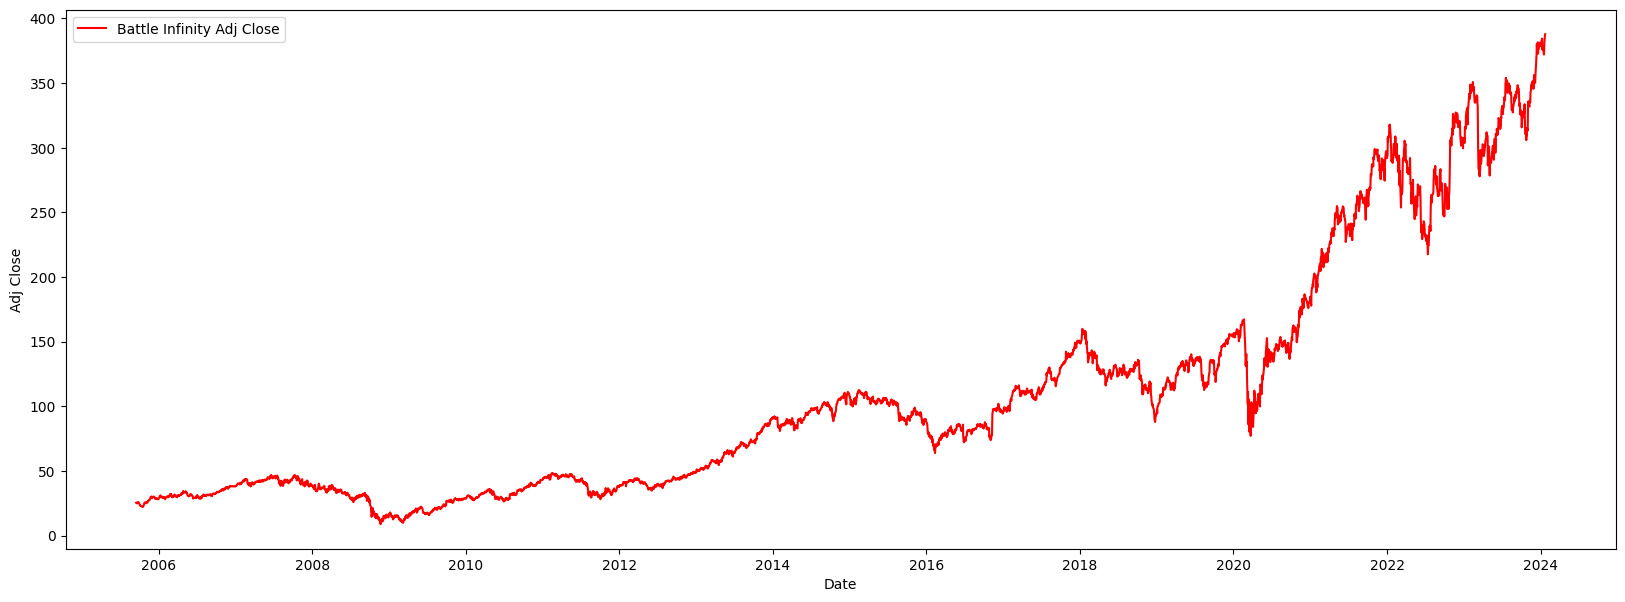

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Adj Close'] = df['Adj Close'].astype(float)

df['Adj Close'] = df['Adj Close'].astype(float)
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values, df['Adj Close'].values, label = 'AMP Crypto Adj Close', color = 'red')
#plt.xticks(np.arange(100,df.shape[0],200))
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup

def get_coin_prices(coin_symbol):
    # Define the URL for the Coinranking website
    url = f"https://coinranking.com/coin/{'AMP'}"

    # Send a GET request to the website
    response = requests.get(url)

    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the element containing the historical prices
        prices_element = soup.find('div', class_='historical-prices')

        if prices_element:
            # Extract historical prices from the element
            prices = [price.text.strip() for price in prices_element.find_all('span', class_='price')]
            return prices
        else:
            print(f"Error: Historical prices not found for {coin_symbol}")
    elif response.status_code == 404:
        print(f"Error: Page not found for {coin_symbol}")
    else:
        print(f"Error: Unable to fetch data. Status code: {response.status_code}")

    return None

# Example usage for AMP cryptocurrency
amp_prices = get_coin_prices('amp')
if amp_prices:
    print("Historical Prices for AMP:")
    for price in amp_prices:
        print(price)


Error: Historical prices not found for amp
